# Station M

### Position: 66.015N, 1.983E


In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

def plot_stationM():

    proj = ccrs.Orthographic(0,45)
    ocean  = cfeature.NaturalEarthFeature('physical', 'ocean', '50m')
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
        edgecolor='k',
        facecolor=cfeature.COLORS['land'])

    fig, ax = plt.subplots(figsize=(7,7),subplot_kw=dict(projection=proj), ncols=1, nrows = 1)

    # Sett grenser for kartutsnittet  - her fra -30E til 30E, og fra 50N til 90N.
    ax.set_extent([-30, 30, 50, 90], ccrs.PlateCarree())

    # Plott land (farger og kantlinje er satt i variabelen land_10m over)
    ax.add_feature(land_10m, facecolor='burlywood', alpha=0.74 )

    # Legg på landegrenser
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=.5)
    ax.gridlines(zorder=100, draw_labels=True)

    # Plott posisjonen til Stasjon M
    # X = lon ,  Y = lat, transform = ccrs.PlateCarree forteller cartopy at X og Y er lengde- og breddegrad. 
    ax.scatter([1.983], [66.015], marker = '*', transform = ccrs.PlateCarree(), label = 'Station M', color = 'mediumslateblue')
    return fig, ax



In [2]:
print(3+1)
import xroms

4


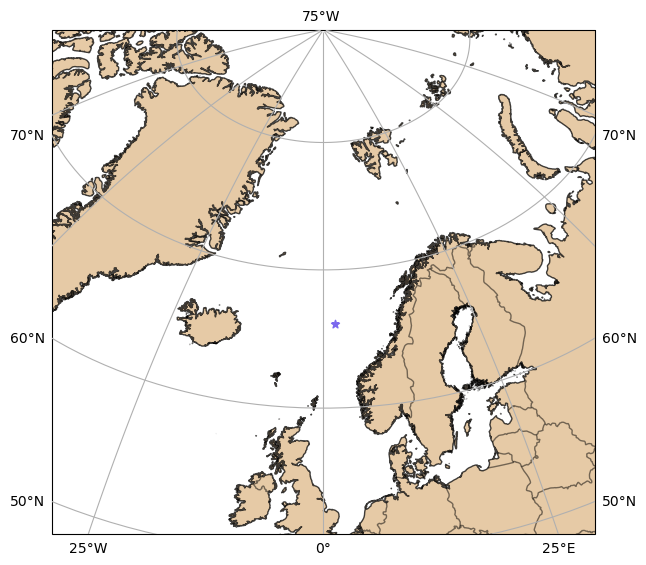

In [4]:
fig, ax = plot_stationM()

## METs operasjonelle havmodeller: 

https://thredds.met.no/thredds/fou-hi/fou-hi.html

### Barents-2.5

 Filene til modellen for Barentshavet har navn som f.eks. dette:
 
 https://thredds.met.no/thredds/dodsC/fou-hi/barents_eps_sdepth/barents_his_20240613T00Zm00_AN.nc
 
 Barents-2.5 har data f.o.m. 10 November 2021.

Valgt dato: 12.06.24


/modules/rhel8/conda/install/envs/production-10-2022/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


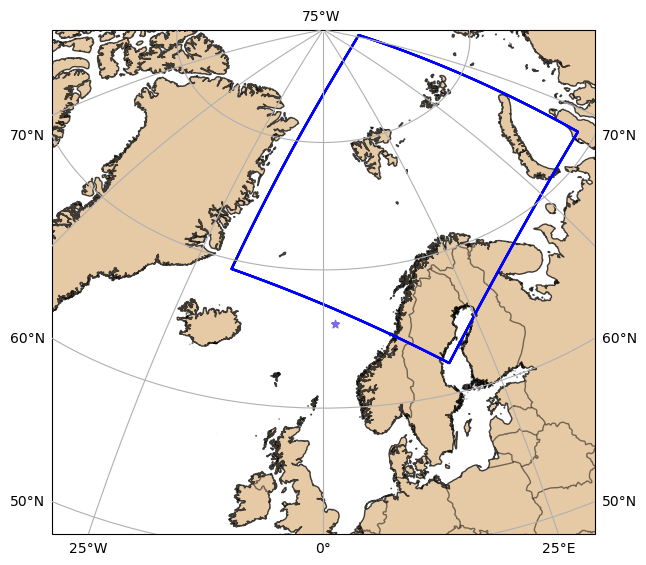

In [4]:
import xarray as xr
import numpy as np 
import datetime

my_date = datetime.datetime(2024, 6, 12)
print('Valgt dato: {}'.format(my_date.strftime('%d.%m.%y')))


barents_file_template = 'https://thredds.met.no/thredds/dodsC/fou-hi/barents_eps_sdepth/barents_his_{}T00Zm00_AN.nc'

# åpne filen for valgt dato:
barents_ds = xr.open_dataset(barents_file_template.format(my_date.strftime('%Y%m%d')))

# Lag en "ramme" som viser området modellen dekker:
barents_domain = np.ones_like(barents_ds.lon_rho.values); barents_domain[1:-1, 1:-1] = 0

# Plott område sammen med Stasjon M:
fig, ax = plot_stationM()
cs = ax.contour(barents_ds.lon_rho.values, barents_ds.lat_rho.values, barents_domain, colors = 'b', linewidth = 3, transform = ccrs.PlateCarree())


### NorkystDA (kalles også Norshelf)
Filsti på thredds: 

https://thredds.met.no/thredds/dodsC/sea_norshelf_files/2024/06/norshelf_qck_an_20240613T00Z.nc

NorkystDA arkivet starter 1. desember 2017. 

/modules/rhel8/conda/install/envs/production-10-2022/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


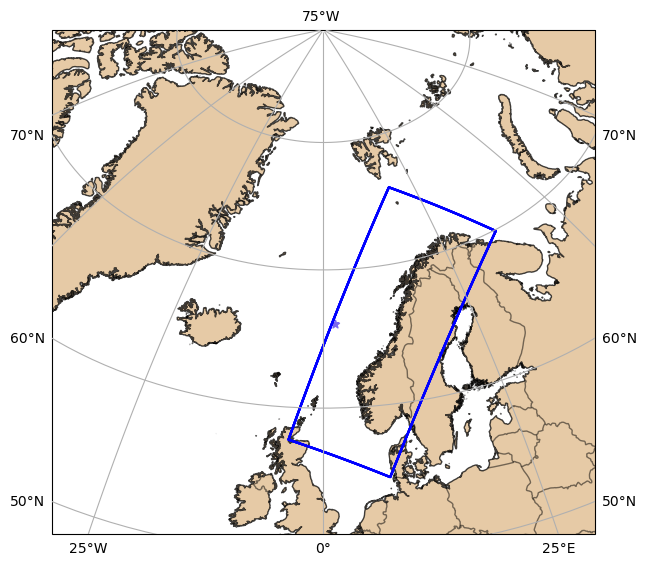

In [5]:
norkyst_DA_template = 'https://thredds.met.no/thredds/dodsC/sea_norshelf_files/{}/norshelf_qck_an_{}T00Z.nc'

# åpne filen for valgt dato (samme som i cellen over). 
# Merk at det er to sett med klammer i template, så dermed trenger vi to argumenter i format
norkystDA_ds = xr.open_dataset(norkyst_DA_template.format(my_date.strftime('%Y/%m') , my_date.strftime('%Y%m%d')))
# Lag en "ramme" som viser området modellen dekker:
norkystDA_domain = np.ones_like(norkystDA_ds.lon_rho.values); norkystDA_domain[1:-1, 1:-1] = 0

# Plott område sammen med Stasjon M:
fig, ax = plot_stationM()
cs = ax.contour(norkystDA_ds.lon_rho.values, norkystDA_ds.lat_rho.values, norkystDA_domain, colors = 'b', linewidth = 3, transform = ccrs.PlateCarree())


### TOPAZ5

Denne modellen dekker hele Nord-Atlanteren og Arktis, med en horisontal oppløsning på 6.25 km. 

Filsti:

https://thredds.met.no/thredds/dodsC/cmems/topaz5phy/cmems_mod_arc_phy_anfc_topaz5_P1D-m.ncml

Første tidspunkt er 5. juli 2021. Kun døgnmidler er arkivert.

['2024-06-12T12:00:00.000000000']


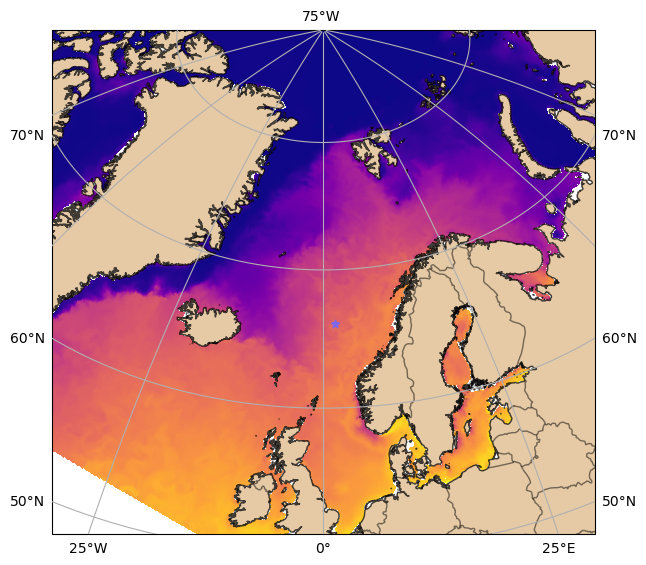

In [6]:
topaz5_agg = 'https://thredds.met.no/thredds/dodsC/cmems/topaz5phy/cmems_mod_arc_phy_anfc_topaz5_P1D-m.ncml'


# åpne filen for valgt dato (samme som i cellen over). 
topaz5_ds = xr.open_dataset(topaz5_agg)
topaz5_ds = topaz5_ds.sel(time = my_date.strftime('%Y-%m-%d'), depth = 0)
print(topaz5_ds.time.values)

# Plott område sammen med Stasjon M:
fig, ax = plot_stationM()
ax.pcolormesh(topaz5_ds.longitude.values, topaz5_ds.latitude.values, topaz5_ds.thetao.values.squeeze(), cmap = plt.cm.plasma , transform = ccrs.PlateCarree(), zorder = 0)


# Observasjoner

Det ligger observasjoner i denne mappen:
/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM

Det er data fra 3 ulike perioder: 

Deployment1: 2020-08-25 til 2021-07-30

Deployment2: 2021-11-27 til 2022-08-02

Deployment3: 1011-11-25 til 2023-08-04

Hver deployment har observasjoner fra 5 dyp: 500, 800, 1000, 1200 og 2000 m

Deployment1 er publisert (https://doi.org/10.21335/NMDC-1279886544), og er på en netcdf fil. 
De to nyere periodene er på tekstfiler (en per dyp). Det følger ogå med en Metadatafil som beskriver innholdet på disse filene. 

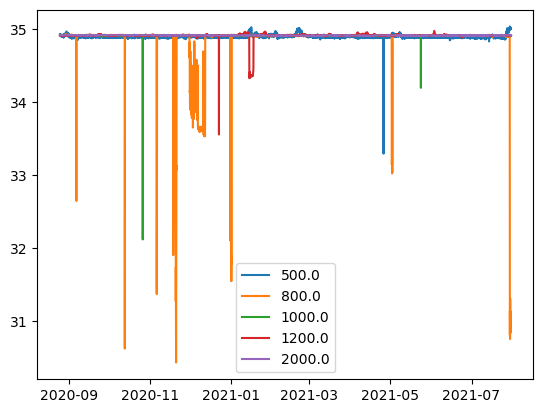

In [7]:
deployment1 = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment1/StationM_2021_hydrography.nc'

with xr.open_dataset(deployment1) as ds:

    for d in ds.DEPTH.values:
        tmp = ds.sel(DEPTH = d)
        plt.plot(tmp.TIME.values, tmp.PSAL.values, label = d)
    plt.legend()


Vi ser at det er noen observasjoner som ser litt rare ut. 
I datasettet er det også variabler som inneholder kvalitetsflagg:		
```
PSAL_QC:flag_values = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ;
PSAL_QC:flag_meanings = "no_qc_performed good_data probably_good_data bad_data_that_are_potentially_correctable bad_data value_changed not_used nominal_value interpolated_value missing_value" ;
```

Vi kan bruke den informasjonen til å filtrere observasjonene:

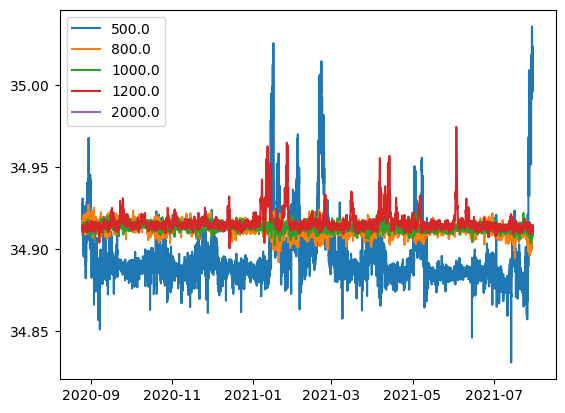

In [8]:
with xr.open_dataset(deployment1) as ds:
    for d in ds.DEPTH.values:
        tmp = ds.sel(DEPTH = d)
        obstime = tmp.TIME.values[np.where(tmp.PSAL_QC < 3)]
        salt = tmp.PSAL.values[np.where(tmp.PSAL_QC < 3)]

        plt.plot(obstime, salt, label = d)
    plt.legend()

In [13]:
import pandas as pd
import datetime
txtfile = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment2/StaM_SBE_20211127_1000m.txt'
#txtfile = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/StationM/Deployment2/StaM_SBE_20211127_500m.txt'

# Dersom du ser på innholdet i filen ser du at den består av kolonner adskilt med mellomrom. 
# Første linje er en header som beskriver innholdet i kolonnen. 

# Merk at kolonnen for dato inneholder 3 elementer som er adskilt med mellomrom. 
# For å lese dette inn korrekt kan vi bruke parse_dates og oppgi hvilke kolonner som skal brukes. 

names = ['T_raw_degC', 'T_raw_qf', 'T_degC', 'T_qf', 'C_raw_S/m', 
         'C_raw_qf',  'C_S/m', 'C_qf', 'p_raw_dbar', 'p_raw_qf', 
         'p_dbar', 'p_qf', 'S_raw', 'S_raw_q', 'S', 'S_qf', 
         'day', 'month', 'year', 'time']

# Dette vil gi 'Datetime' som string/tekst. Hvis vi vil at pandas skal tolke dette som et datetime object 
# kan vi gi informasjon om hvordan denne stringen er formatert med argumentet date_parser.  
#
# For denne filen vil det kunne se slik ut:
# parse = lambda x: datetime.datetime.strptime(x, '%d %b %Y %H:%M:%S')
# Betydningen av de ulike %bokstaven finnes her: (https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

# Men for å gjøre ting litt vanskligere er det brukt norske forkortelser for månedsnavn... 
# Vi bytter enkelt ut norske forkortelser med engelske ved å bruke metoden .replace(norsk, engelsk)

parse = lambda x: datetime.datetime.strptime(x.replace('Des', 'Dec').replace('Mai', 'May').replace('Okt', 'Oct'), '%d %b %Y %H:%M:%S')
                                             
df = pd.read_csv(txtfile, names = names , delim_whitespace=True,  header =1 , parse_dates={"Datetime" : ['day', 'month', 'year', 'time']}, date_parser = parse)

# Vis de første 10 linjene av filen:
df.head(10)


,Datetime,T_raw_degC,T_raw_qf,T_degC,T_qf,C_raw_S/m,C_raw_qf,C_S/m,C_qf,p_raw_dbar,p_raw_qf,p_dbar,p_qf,S_raw,S_raw_q,S,S_qf
0,2021-11-27 13:00:23,-0.4623,0,-0.4623,1,2.90347,0,2.90347,1,1036.935,0,1036.935,1,34.903278,0,34.912240,1
1,2021-11-27 14:00:22,-0.4573,0,-0.4573,1,2.90386,0,2.90386,1,1038.251,0,1038.251,1,34.902026,0,34.910988,1
2,2021-11-27 15:00:22,-0.4505,0,-0.4505,1,2.90443,0,2.90443,1,1039.127,0,1039.127,1,34.901379,0,34.910341,1
3,2021-11-27 16:00:22,-0.4569,0,-0.4569,1,2.90396,0,2.90396,1,1040.192,0,1040.192,1,34.901780,0,34.910742,1
4,2021-11-27 17:00:22,-0.4477,0,-0.4477,1,2.90476,0,2.90476,1,1040.130,0,1040.130,1,34.902010,0,34.910972,1
5,2021-11-27 18:00:22,-0.4445,0,-0.4445,1,2.90514,0,2.90514,1,1039.378,0,1039.378,1,34.903866,0,34.912828,1
6,2021-11-27 19:00:22,-0.4573,0,-0.4573,1,2.90385,0,2.90385,1,1038.438,0,1038.438,1,34.901785,0,34.910747,1
7,2021-11-27 20:00:22,-0.4678,0,-0.4678,1,2.90289,0,2.90289,1,1037.436,0,1037.436,1,34.901516,0,34.910478,1
8,2021-11-27 21:00:22,-0.4424,0,-0.4424,1,2.90495,0,2.90495,1,1036.496,0,1036.496,1,34.900618,0,34.909580,1
9,2021-11-27 22:00:22,-0.4530,0,-0.4530,1,2.90402,0,2.90402,1,1035.933,0,1035.933,1,34.900610,0,34.909572,1


/tmp/ipykernel_1028281/1001305406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.S[df.S_qf >= 3] = np.nan


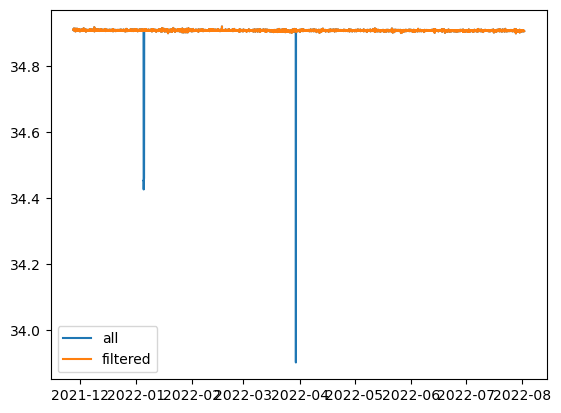

In [14]:
# Plott saltholdighetsdata: 
plt.plot(df.Datetime, df.S, label = 'all')

# Sett alle saltholdighetsverdier med kvalitetsflagg 3 eller høyere til NaN
df.S[df.S_qf >= 3] = np.nan

plt.plot(df.Datetime, df.S, label = 'filtered')
plt.legend()